In [2]:
# importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import os

In [4]:
os.getcwd

<function nt.getcwd()>

In [5]:
#defining path of the file
os.chdir('C:\\Users\\abini\\Downloads')

In [6]:
pd.set_option('display.max_columns', 50)

In [7]:
# Loading dataset
def load_dataset():
    df = pd.read_excel('Lead_Scoring.xlsx')
    return df

In [8]:
data = load_dataset()
data

,Customer ID,Lead Source,Last Activity,Lead Number,Do Not Email,Do Not Call,Lead Origin,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,City,Specialization,Sources,Current occupation,Reason,Search,Magazine,Digital Advertisement,Through Recommendations,Receive More Updates,Tags,Lead Quality,Lead Profile,Pay-Cheque,Free Demo,Last Notable Activity
0,2128b2df-8bba-4d29-b9a2-b6e0beafe620,Olark Chat,Page Visited on Website,660710.0,No,No,API,0.0,0.0,0.0,0.00,NaN,Select,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,Organic Search,Email Opened,660791.0,No,No,API,0.0,5.0,674.0,2.50,India,Select,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,NaN,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Direct Traffic,Email Opened,630727.0,No,No,Landing Page Submission,1.0,2.0,1532.0,2.00,India,Mumbai,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,No,Yes,Email Opened
3,66592df48-7cf4-4e39-9de9-19797f9b38cc,Direct Traffic,Unreachable,660719.0,No,No,Landing Page Submission,0.0,1.0,305.0,1.00,India,Mumbai,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,Not Sure,Select,No,No,Modified
4,3227hf628-e534-4826-9d63-4a8b88782852,Google,Converted to Lead,660681.0,No,No,Landing Page Submission,0.0,2.0,1428.0,1.00,India,Mumbai,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,Select,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9228,19d6451e-fcd6-407c-b83b-48e1af805ea9,Direct Traffic,Email Marked Spam,579564.0,Yes,No,Landing Page Submission,1.0,8.0,1845.0,2.67,Saudi Arabia,Mumbai,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,High in Relevance,Potential Lead,No,No,Email Marked Spam
9229,82a7005b-7196-4d56-95ce-a79f937a158d,Direct Traffic,SMS Sent,579546.0,No,No,Landing Page Submission,0.0,2.0,238.0,2.00,India,Mumbai,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,wrong number given,Might be,Potential Lead,No,Yes,SMS Sent
9230,aac550fe-a586-452d-8d3c-f1b62c94e02c,Direct Traffic,SMS Sent,579545.0,Yes,No,Landing Page Submission,0.0,2.0,199.0,2.00,India,Mumbai,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,invalid number,Not Sure,Potential Lead,No,Yes,SMS Sent
9231,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Google,SMS Sent,579538.0,No,No,Landing Page Submission,1.0,3.0,499.0,3.00,India,Other Metro Cities,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,NaN,NaN,NaN,No,No,SMS Sent


In [9]:
#For reference
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9233 entries, 0 to 9232
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  9232 non-null   object 
 1   Lead Source                  9196 non-null   object 
 2   Last Activity                9130 non-null   object 
 3   Lead Number                  9232 non-null   float64
 4   Do Not Email                 9232 non-null   object 
 5   Do Not Call                  9232 non-null   object 
 6   Lead Origin                  9232 non-null   object 
 7   Converted                    9232 non-null   float64
 8   TotalVisits                  9096 non-null   float64
 9   Total Time Spent on Website  9232 non-null   float64
 10  Page Views Per Visit         9096 non-null   float64
 11  Country                      6776 non-null   object 
 12  City                         7815 non-null   object 
 13  Specialization    

Q1.Find the number of rows and columns in the dataset.

In [10]:
rows = len(data.axes[0])
 
cols = len(data.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  9233
Number of Columns:  28


In [11]:
#Count of customers from various countries 
g1 = data.groupby(["Country"]).size().sort_values(ascending=False).reset_index(name='Number of customers')
print(g1)

                 Country  Number of customers
0                  India                 6489
1          United States                   69
2   United Arab Emirates                   53
3              Singapore                   24
4           Saudi Arabia                   21
5         United Kingdom                   15
6              Australia                   13
7                  Qatar                   10
8                Bahrain                    7
9              Hong Kong                    7
10                France                    6
11                  Oman                    6
12               unknown                    5
13                Kuwait                    4
14               Nigeria                    4
15          South Africa                    4
16               Germany                    4
17                Canada                    4
18                Sweden                    3
19                Uganda                    2
20           Philippines          

Q2.Find out the number of customers who-

* Are outside of India
* Count of customers from various countries and plot a graph for the same
* Highest number of customers from which country


In [12]:
c_countries = data['Country'].value_counts()
records, columns = data.shape
country_unknown = records - c_countries.sum()
outside_india = c_countries.sum()-c_countries[0]
print('Number of customers from unknown countries', country_unknown)

print()

print('Number of customers who are from outside of India are', outside_india)

Number of customers from unknown countries 2457

Number of customers who are from outside of India are 287


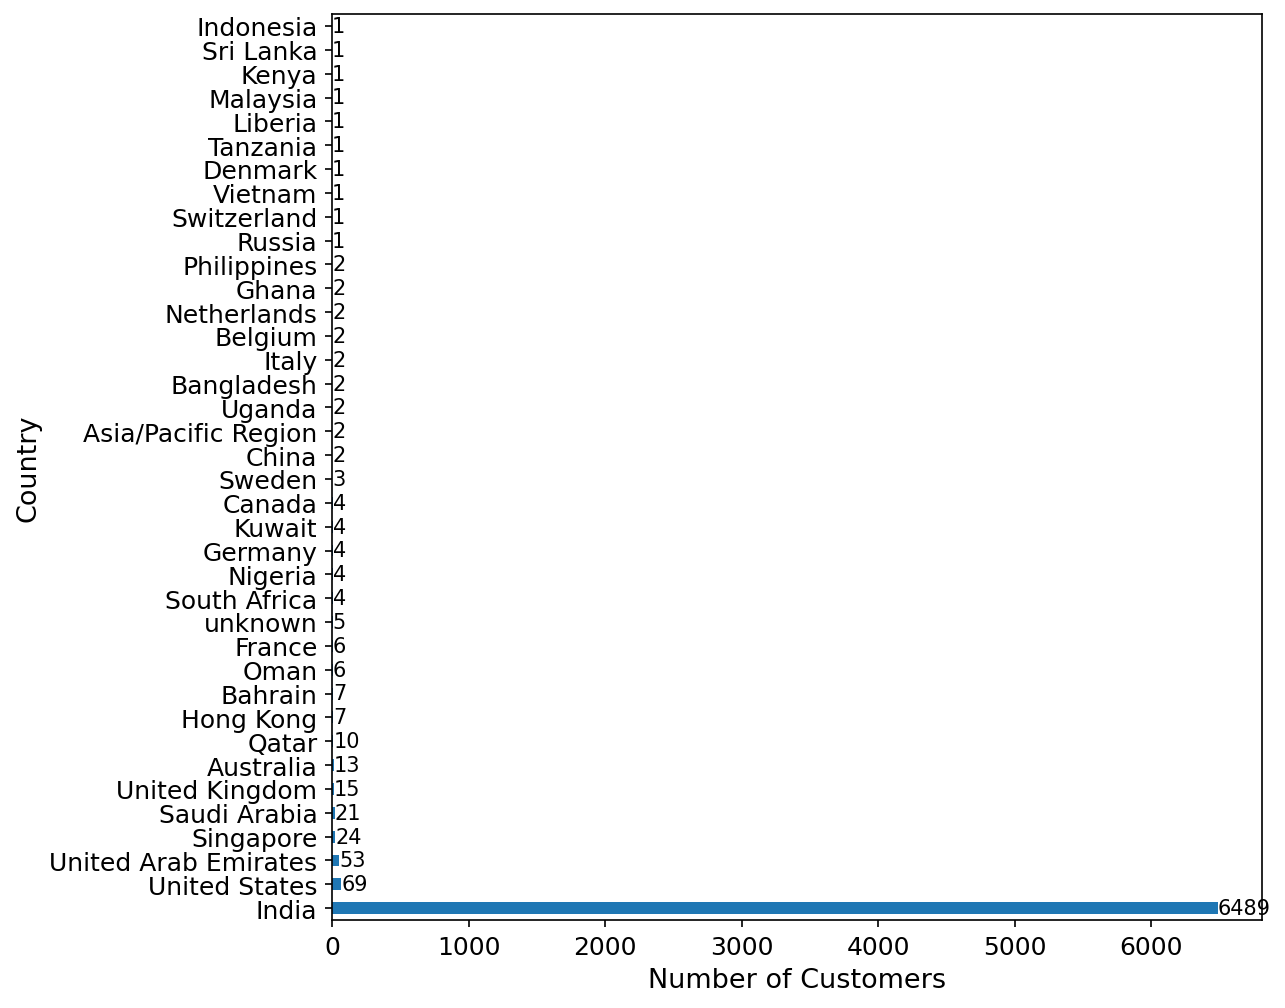

In [17]:
#plotting top 10 countries w.r.t number of customers, can view all countries by removing [:10] or changing index.
fig, ax = plt.subplots(1, 1,  figsize=(8, 8), dpi = 150)
data['Country'].value_counts().plot(kind = 'barh', fontsize = 12, ax = ax)
plt.xlabel('Number of Customers',fontsize = 13)
ax.bar_label(ax.containers[0], fontsize = 10)
plt.ylabel('Country',fontsize = 13)
plt.show()

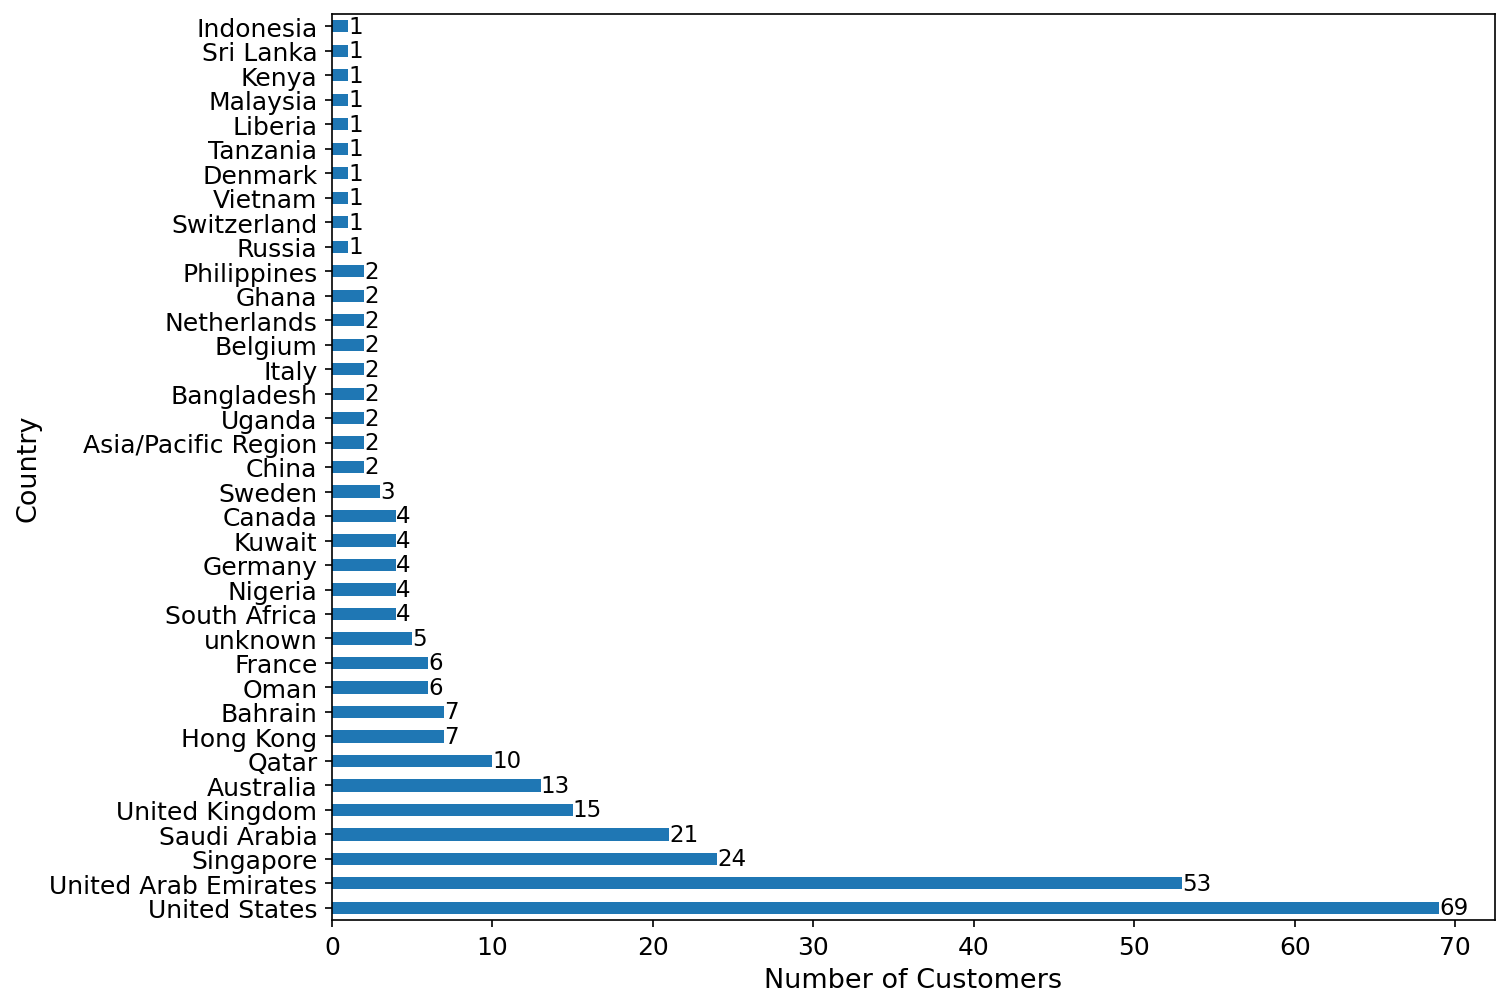

In [15]:
#plotting top 10 countries w.r.t number of customers
fig, ax = plt.subplots(1, 1,  figsize=(10,8), dpi = 150)
data['Country'].value_counts()[1:].plot(kind = 'barh', fontsize = 12, ax = ax)
plt.xlabel('Number of Customers',fontsize = 13)
ax.bar_label(ax.containers[0], fontsize = 11)
plt.ylabel('Country',fontsize = 13)
plt.show()

In [18]:
#Country with highest number of customers, from g1 dataframe, where number of customers w.r.t countries is in descending order, fetching top value which will be maximum
g1.loc[0]
print('Maximum number of', g1.loc[0]['Number of customers'], 'customers', 'are from' ,  g1.loc[0]['Country'])

Maximum number of 6489 customers are from India


Q3.Create a new column as index in the dataset

In [19]:
data['Index'] = range(len(data))
data.set_index('Index')

,Customer ID,Lead Source,Last Activity,Lead Number,Do Not Email,Do Not Call,Lead Origin,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,City,Specialization,Sources,Current occupation,Reason,Search,Magazine,Digital Advertisement,Through Recommendations,Receive More Updates,Tags,Lead Quality,Lead Profile,Pay-Cheque,Free Demo,Last Notable Activity
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2128b2df-8bba-4d29-b9a2-b6e0beafe620,Olark Chat,Page Visited on Website,660710.0,No,No,API,0.0,0.0,0.0,0.00,NaN,Select,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,Organic Search,Email Opened,660791.0,No,No,API,0.0,5.0,674.0,2.50,India,Select,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,NaN,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Direct Traffic,Email Opened,630727.0,No,No,Landing Page Submission,1.0,2.0,1532.0,2.00,India,Mumbai,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,No,Yes,Email Opened
3,66592df48-7cf4-4e39-9de9-19797f9b38cc,Direct Traffic,Unreachable,660719.0,No,No,Landing Page Submission,0.0,1.0,305.0,1.00,India,Mumbai,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,Not Sure,Select,No,No,Modified
4,3227hf628-e534-4826-9d63-4a8b88782852,Google,Converted to Lead,660681.0,No,No,Landing Page Submission,0.0,2.0,1428.0,1.00,India,Mumbai,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,Select,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9228,19d6451e-fcd6-407c-b83b-48e1af805ea9,Direct Traffic,Email Marked Spam,579564.0,Yes,No,Landing Page Submission,1.0,8.0,1845.0,2.67,Saudi Arabia,Mumbai,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,High in Relevance,Potential Lead,No,No,Email Marked Spam
9229,82a7005b-7196-4d56-95ce-a79f937a158d,Direct Traffic,SMS Sent,579546.0,No,No,Landing Page Submission,0.0,2.0,238.0,2.00,India,Mumbai,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,wrong number given,Might be,Potential Lead,No,Yes,SMS Sent
9230,aac550fe-a586-452d-8d3c-f1b62c94e02c,Direct Traffic,SMS Sent,579545.0,Yes,No,Landing Page Submission,0.0,2.0,199.0,2.00,India,Mumbai,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,invalid number,Not Sure,Potential Lead,No,Yes,SMS Sent


Q4.Using loop changing the values of ‘Select’ to ‘NaN’ of city column

In [20]:
#Using loop changing the values of ‘Select’ to ‘NaN’ of city column
for i in range(len(data['City'])):
        if data['City'][i]=='Select':
            data['City'][i] = np.nan
           
data.head(10)                               

C:\Users\abini\AppData\Local\Temp\ipykernel_15072\2765489791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['City'][i] = np.nan


,Customer ID,Lead Source,Last Activity,Lead Number,Do Not Email,Do Not Call,Lead Origin,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,City,Specialization,Sources,Current occupation,Reason,Search,Magazine,Digital Advertisement,Through Recommendations,Receive More Updates,Tags,Lead Quality,Lead Profile,Pay-Cheque,Free Demo,Last Notable Activity,Index
0,2128b2df-8bba-4d29-b9a2-b6e0beafe620,Olark Chat,Page Visited on Website,660710.0,No,No,API,0.0,0.0,0.0,0.0,NaN,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,No,No,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,Organic Search,Email Opened,660791.0,No,No,API,0.0,5.0,674.0,2.5,India,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,NaN,Select,No,No,Email Opened,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Direct Traffic,Email Opened,630727.0,No,No,Landing Page Submission,1.0,2.0,1532.0,2.0,India,Mumbai,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,No,Yes,Email Opened,2
3,66592df48-7cf4-4e39-9de9-19797f9b38cc,Direct Traffic,Unreachable,660719.0,No,No,Landing Page Submission,0.0,1.0,305.0,1.0,India,Mumbai,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,Not Sure,Select,No,No,Modified,3
4,3227hf628-e534-4826-9d63-4a8b88782852,Google,Converted to Lead,660681.0,No,No,Landing Page Submission,0.0,2.0,1428.0,1.0,India,Mumbai,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,Select,No,No,Modified,4
5,2058ef08-2858-443e-a01f-a9237db2f5ce,Olark Chat,Olark Chat Conversation,660680.0,No,No,API,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,NaN,NaN,NaN,No,No,Modified,5
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Google,Email Opened,660673.0,No,No,Landing Page Submission,1.0,2.0,1640.0,2.0,India,Mumbai,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Low in Relevance,Potential Lead,No,No,Modified,6
7,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Direct Traffic,Email Opened,660624.0,No,No,Landing Page Submission,0.0,2.0,71.0,2.0,India,Thane & Outskirts,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,NaN,NaN,NaN,No,Yes,Email Opened,7
8,af465dfc-7204-4130-9e05-33231863c4b5,Google,Email Opened,660616.0,No,No,API,0.0,4.0,58.0,4.0,India,Mumbai,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,NaN,NaN,NaN,No,No,Email Opened,8
9,2a369e35-ca95-4ca9-9e4f-9d27175aa320,Organic Search,Email Opened,660608.0,No,No,Landing Page Submission,1.0,8.0,1351.0,8.0,India,Other Metro Cities,Travel and Tourism,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,NaN,No,Yes,Email Opened,9


Q5. Replace all the missing/blank values in the dataset with NaN

In [21]:
# Replacing all blank values of DataFrame data by NaN.
data = data.replace(r'^\s*$', np.nan, regex=True)
data

,Customer ID,Lead Source,Last Activity,Lead Number,Do Not Email,Do Not Call,Lead Origin,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,City,Specialization,Sources,Current occupation,Reason,Search,Magazine,Digital Advertisement,Through Recommendations,Receive More Updates,Tags,Lead Quality,Lead Profile,Pay-Cheque,Free Demo,Last Notable Activity,Index
0,2128b2df-8bba-4d29-b9a2-b6e0beafe620,Olark Chat,Page Visited on Website,660710.0,No,No,API,0.0,0.0,0.0,0.00,NaN,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,No,No,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,Organic Search,Email Opened,660791.0,No,No,API,0.0,5.0,674.0,2.50,India,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,NaN,Select,No,No,Email Opened,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Direct Traffic,Email Opened,630727.0,No,No,Landing Page Submission,1.0,2.0,1532.0,2.00,India,Mumbai,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,No,Yes,Email Opened,2
3,66592df48-7cf4-4e39-9de9-19797f9b38cc,Direct Traffic,Unreachable,660719.0,No,No,Landing Page Submission,0.0,1.0,305.0,1.00,India,Mumbai,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,Not Sure,Select,No,No,Modified,3
4,3227hf628-e534-4826-9d63-4a8b88782852,Google,Converted to Lead,660681.0,No,No,Landing Page Submission,0.0,2.0,1428.0,1.00,India,Mumbai,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,Select,No,No,Modified,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9228,19d6451e-fcd6-407c-b83b-48e1af805ea9,Direct Traffic,Email Marked Spam,579564.0,Yes,No,Landing Page Submission,1.0,8.0,1845.0,2.67,Saudi Arabia,Mumbai,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,High in Relevance,Potential Lead,No,No,Email Marked Spam,9228
9229,82a7005b-7196-4d56-95ce-a79f937a158d,Direct Traffic,SMS Sent,579546.0,No,No,Landing Page Submission,0.0,2.0,238.0,2.00,India,Mumbai,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,wrong number given,Might be,Potential Lead,No,Yes,SMS Sent,9229
9230,aac550fe-a586-452d-8d3c-f1b62c94e02c,Direct Traffic,SMS Sent,579545.0,Yes,No,Landing Page Submission,0.0,2.0,199.0,2.00,India,Mumbai,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,invalid number,Not Sure,Potential Lead,No,Yes,SMS Sent,9230
9231,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Google,SMS Sent,579538.0,No,No,Landing Page Submission,1.0,3.0,499.0,3.00,India,Other Metro Cities,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,NaN,NaN,NaN,No,No,SMS Sent,9231


Q6. Find the average time spent on the website

In [22]:
#Computing the average time spent on the website
Avg_time = data['Total Time Spent on Website'].mean()
print('Average time spent on website is', round(Avg_time, 3),'seconds')
print('Average time spent on website is', round(Avg_time/60,2), 'minutes')

Average time spent on website is 487.973 seconds
Average time spent on website is 8.13 minutes


Q7. The column ‘total time spent on the website’ is in seconds. Convert that to a desired form(min or hours) and find the highest count and plot an applicable graph for the same.

In [23]:
#Adding a new column 'Total time Spent on Website in minutes' to data.
data['Total Time Spent on Website in Minutes'] = data['Total Time Spent on Website']/60
data['Total Time Spent on Website in Minutes'] = data['Total Time Spent on Website in Minutes'].round(decimals = 0)
data.head()

,Customer ID,Lead Source,Last Activity,Lead Number,Do Not Email,Do Not Call,Lead Origin,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,City,Specialization,Sources,Current occupation,Reason,Search,Magazine,Digital Advertisement,Through Recommendations,Receive More Updates,Tags,Lead Quality,Lead Profile,Pay-Cheque,Free Demo,Last Notable Activity,Index,Total Time Spent on Website in Minutes
0,2128b2df-8bba-4d29-b9a2-b6e0beafe620,Olark Chat,Page Visited on Website,660710.0,No,No,API,0.0,0.0,0.0,0.0,NaN,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,No,No,Modified,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,Organic Search,Email Opened,660791.0,No,No,API,0.0,5.0,674.0,2.5,India,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,NaN,Select,No,No,Email Opened,1,11.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Direct Traffic,Email Opened,630727.0,No,No,Landing Page Submission,1.0,2.0,1532.0,2.0,India,Mumbai,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,No,Yes,Email Opened,2,26.0
3,66592df48-7cf4-4e39-9de9-19797f9b38cc,Direct Traffic,Unreachable,660719.0,No,No,Landing Page Submission,0.0,1.0,305.0,1.0,India,Mumbai,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,Not Sure,Select,No,No,Modified,3,5.0
4,3227hf628-e534-4826-9d63-4a8b88782852,Google,Converted to Lead,660681.0,No,No,Landing Page Submission,0.0,2.0,1428.0,1.0,India,Mumbai,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,Select,No,No,Modified,4,24.0


In [24]:
#Count of customers w.r.t total time spent on website.
g2 = data.groupby(["Total Time Spent on Website in Minutes"]).size().sort_values(ascending=False).reset_index(name='Number of customers')
print(g2)

print()

#Getting the time which is been spent by maximum number of customers.
print('Maximum number of',g2.loc[0]['Number of customers'], 'customers', 'have spent',g2.loc[0]['Total Time Spent on Website in Minutes'], 'minutes on website.' )

    Total Time Spent on Website in Minutes  Number of customers
0                                      0.0                 2492
1                                      1.0                  644
2                                      2.0                  595
3                                      4.0                  550
4                                      3.0                  526
5                                      5.0                  434
6                                      6.0                  395
7                                      7.0                  271
8                                     22.0                  196
9                                     18.0                  194
10                                    19.0                  191
11                                    21.0                  190
12                                    20.0                  188
13                                     8.0                  185
14                                    16

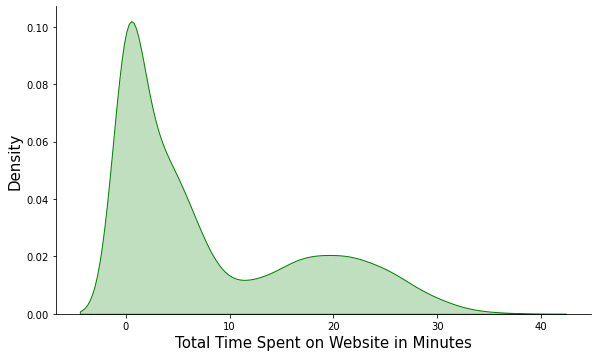

In [25]:
#sns.displot(data, x = 'Total Time Spent on Website in Minutes', kind = 'kde')
sns.displot(data, x = 'Total Time Spent on Website in Minutes', kind = 'kde', aspect=10/6, fill = True, color = 'green')
plt.xlabel('Total Time Spent on Website in Minutes',fontsize = 15)
plt.ylabel('Density',fontsize = 15)
plt.show()

Q8. Convert the column of ‘Converted’ from values 1/0 to yes/no and find the count of yes and no and plot a graph for the same.

In [26]:
# Convert the column of ‘Converted’ from values 1/0 to yes/no
data['Converted'] = data['Converted'].map({1.0: 'yes', 0.0: 'No'})
data.head(10)

,Customer ID,Lead Source,Last Activity,Lead Number,Do Not Email,Do Not Call,Lead Origin,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,City,Specialization,Sources,Current occupation,Reason,Search,Magazine,Digital Advertisement,Through Recommendations,Receive More Updates,Tags,Lead Quality,Lead Profile,Pay-Cheque,Free Demo,Last Notable Activity,Index,Total Time Spent on Website in Minutes
0,2128b2df-8bba-4d29-b9a2-b6e0beafe620,Olark Chat,Page Visited on Website,660710.0,No,No,API,No,0.0,0.0,0.0,NaN,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,No,No,Modified,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,Organic Search,Email Opened,660791.0,No,No,API,No,5.0,674.0,2.5,India,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,NaN,Select,No,No,Email Opened,1,11.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Direct Traffic,Email Opened,630727.0,No,No,Landing Page Submission,yes,2.0,1532.0,2.0,India,Mumbai,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,No,Yes,Email Opened,2,26.0
3,66592df48-7cf4-4e39-9de9-19797f9b38cc,Direct Traffic,Unreachable,660719.0,No,No,Landing Page Submission,No,1.0,305.0,1.0,India,Mumbai,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,Not Sure,Select,No,No,Modified,3,5.0
4,3227hf628-e534-4826-9d63-4a8b88782852,Google,Converted to Lead,660681.0,No,No,Landing Page Submission,No,2.0,1428.0,1.0,India,Mumbai,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,Select,No,No,Modified,4,24.0
5,2058ef08-2858-443e-a01f-a9237db2f5ce,Olark Chat,Olark Chat Conversation,660680.0,No,No,API,No,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,NaN,NaN,NaN,No,No,Modified,5,0.0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Google,Email Opened,660673.0,No,No,Landing Page Submission,yes,2.0,1640.0,2.0,India,Mumbai,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Low in Relevance,Potential Lead,No,No,Modified,6,27.0
7,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Direct Traffic,Email Opened,660624.0,No,No,Landing Page Submission,No,2.0,71.0,2.0,India,Thane & Outskirts,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,NaN,NaN,NaN,No,Yes,Email Opened,7,1.0
8,af465dfc-7204-4130-9e05-33231863c4b5,Google,Email Opened,660616.0,No,No,API,No,4.0,58.0,4.0,India,Mumbai,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,NaN,NaN,NaN,No,No,Email Opened,8,1.0
9,2a369e35-ca95-4ca9-9e4f-9d27175aa320,Organic Search,Email Opened,660608.0,No,No,Landing Page Submission,yes,8.0,1351.0,8.0,India,Other Metro Cities,Travel and Tourism,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Might be,NaN,No,Yes,Email Opened,9,23.0


In [27]:
#Getting the count of customers w.r.t lead conversion.
print( 'Number of Customers whose lead has been successfully converted is', data['Converted'].value_counts()['yes'] )
print( 'Number of Customers whose lead was not converted is',data['Converted'].value_counts()['No'] )

Number of Customers whose lead has been successfully converted is 3558
Number of Customers whose lead was not converted is 5674


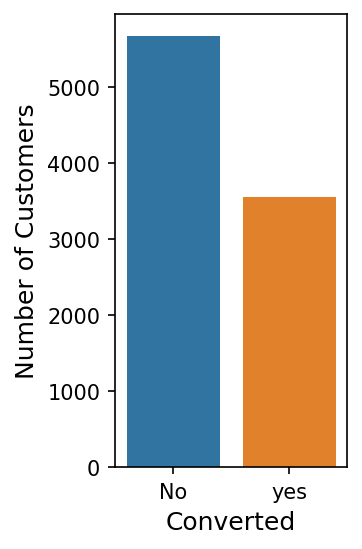

In [30]:
#Plot showing number of customers against lead conversion.
plt.figure(figsize = (2,4), dpi = 150)
sns.countplot(x='Converted',data=data)  
plt.xlabel('Converted',fontsize = 12)
plt.ylabel('Number of Customers',fontsize = 12)
plt.show() 

Q9. Check how the total time spent on the website and converted are related.

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website in Minutes'>

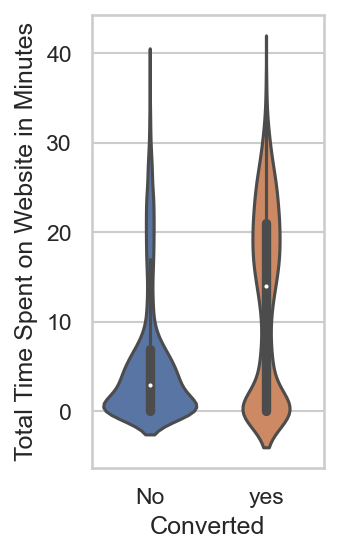

In [35]:
plt.figure(figsize = (2,4), dpi = 150)
sns.set(style = 'whitegrid') 
tip = seaborn.load_dataset('tips')
  
sns.violinplot(x ='Converted', y ='Total Time Spent on Website in Minutes', data = data)

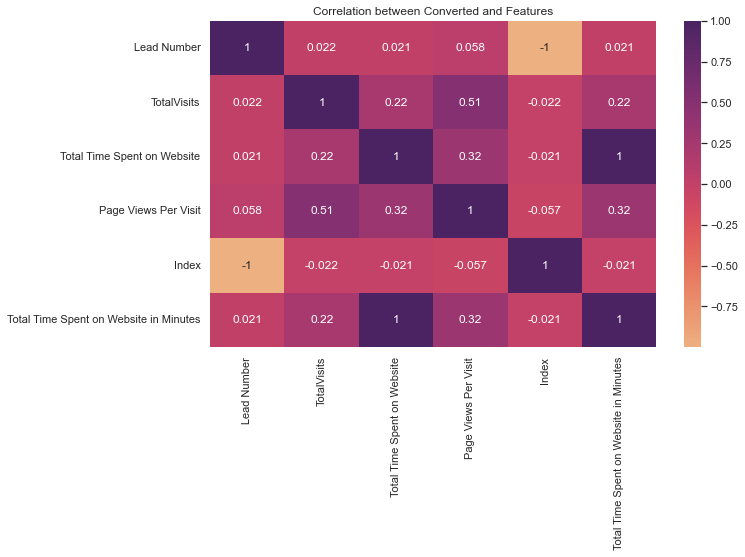

In [36]:
plt.figure(figsize = (10,6))
plt.title("Correlation between Converted and Features")
sns.heatmap(data.corr(), annot = True, cmap = 'flare')

plt.show()

Q10. Find unique values from the column Lead Origin, create a dictionary and map against them the number of times they have appeared in the column.

In [37]:
#unique values from the column Lead Origin of data
LO = data['Lead Origin'].unique()
Lead_Origin_Values = LO.tolist()
Lead_Origin_Values

['API',
 'Landing Page Submission',
 nan,
 'Lead Add Form',
 'Lead Import',
 'Quick Add Form']

In [38]:
#dataframe of lead origins with the count of their occurence in data.
g2 = data.groupby(["Lead Origin"]).size().sort_values(ascending=False).reset_index(name='Number of Occurence')
print(g2)

               Lead Origin  Number of Occurence
0  Landing Page Submission                 4885
1                      API                 3574
2            Lead Add Form                  717
3              Lead Import                   55
4           Quick Add Form                    1


In [39]:
#dictionary by mapping Lead Origin against them the number of times they have appeared.
dict_Lead_Origin_Occurence = g2.set_index(['Lead Origin']).to_dict()['Number of Occurence']
dict_Lead_Origin_Occurence

{'Landing Page Submission': 4885,
 'API': 3574,
 'Lead Add Form': 717,
 'Lead Import': 55,
 'Quick Add Form': 1}